# Aravinda Raman J

## Data Science and Business Analytics Intern @ TSF 

### <u>Prediction Using Decision Tree </u>

#### <u>Problem Statement</u> - Creation Of Decision Tree Classifier that predicts class based on data and vizualizing the same graphically



* Step 1 : Importing libraries and dataset
* Step 2 : Checking for duplicated and null values
* Step 3 : Splitting the data into training and test sets after finding correlation between the attributes
* Step 4 : Building the decision tree model
* Step 5 : Finding the accuracy and confusion matrix for testing and training sets and evaluating the model
* Step 6 : Visualizing the decision tree and evaluating the model

**Dataset used:** https://bit.ly/3kXTdox


###  Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
data = pd.read_csv('Iris.csv') # loading dataset

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.drop(['Id'],inplace=True,axis=1)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.shape #checking shape of dataset

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for duplicated and null values

In [10]:
data.isnull().sum() # checking for null values in dataset and summing them up for each attribute

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.duplicated().sum() # checking for duplicates and dropping them from the dataset
data[data.duplicated()==True]
data.drop_duplicates(inplace=True)

In [12]:
data.nunique() #checking for the number of unique datset values

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [13]:
data.Species.value_counts() 

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

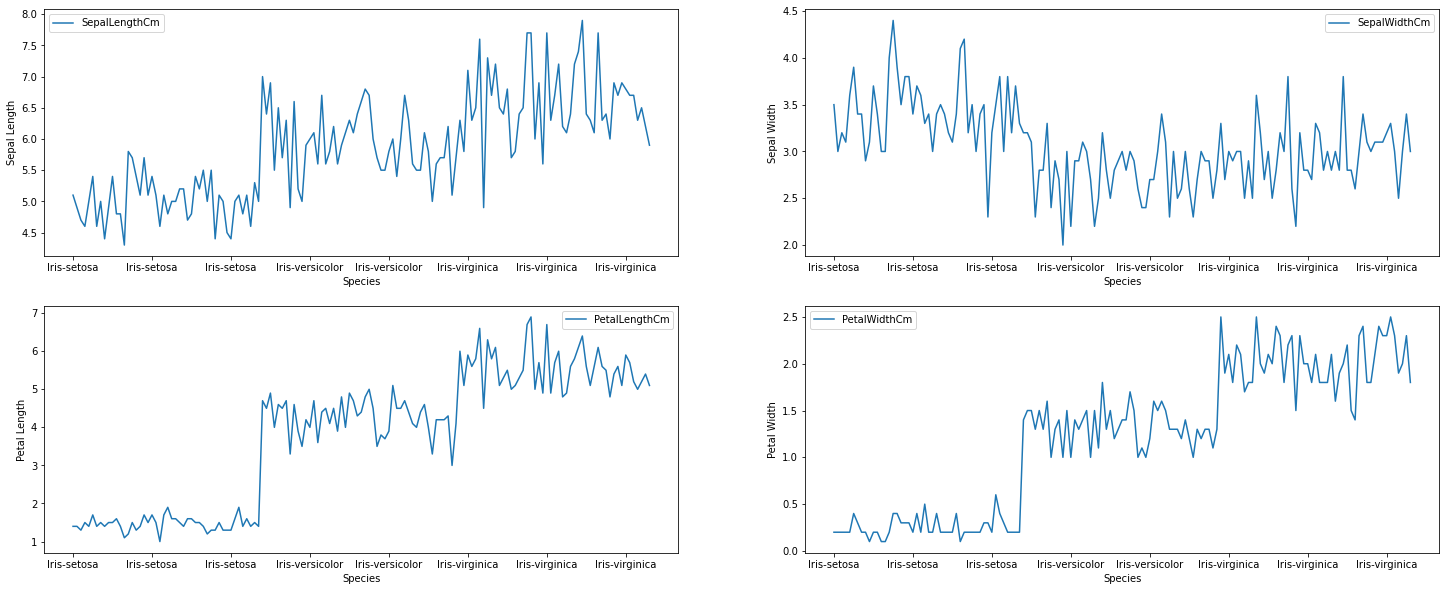

In [14]:
# Graphs showing the relation of the differnet attributes with species

fig ,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

data.plot(kind='line', x='Species', y= 'SepalLengthCm',figsize=(25,10), ax=ax1)
ax1.set_xlabel('Species')
ax1.set_ylabel('Sepal Length')

data.plot(kind='line', x='Species', y= 'SepalWidthCm',figsize=(25,10), ax=ax2)
ax2.set_xlabel('Species')
ax2.set_ylabel('Sepal Width')

data.plot(kind='line', x='Species', y= 'PetalLengthCm',figsize=(25,10), ax=ax3)
ax3.set_xlabel('Species')
ax3.set_ylabel('Petal Length')

data.plot(kind='line', x='Species', y= 'PetalWidthCm',figsize=(25,10), ax=ax4)
ax4.set_xlabel('Species')
ax4.set_ylabel('Petal Width')

plt.show()


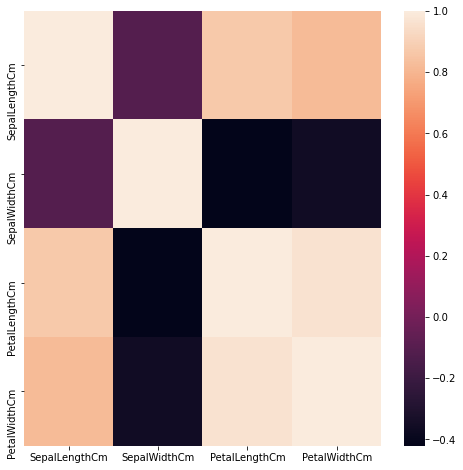

In [15]:
#Heatmap showing the correlation of each of the attributes

plt.figure(figsize=(8,8))  
p=sns.heatmap(data.corr())

### Building the decision tree model

In [16]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Splitting the data into training and test sets after finding correlation between the attributes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 4)
(30, 4)
(117,)
(30,)


In [20]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
y_pred = classifier.predict(X_test)

### Finding the accuracy and confusion matrix for testing and training sets and evaluating the model

In [22]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [23]:
rep = confusion_matrix(y_pred,y_test)
print(rep)

[[ 9  0  0]
 [ 0 12  1]
 [ 0  1  7]]


In [24]:
acc = accuracy_score(y_pred,y_test)
print(acc)

0.9333333333333333


In [25]:
report = classification_report(y_pred,y_test)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.76 %
Standard Deviation: 5.65 %


In [27]:
input = [[6.7,3.0,5.2,2.3]]
print(classifier.predict(input))

['Iris-virginica']


In [28]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Visualizing the decision tree and evaluating the model

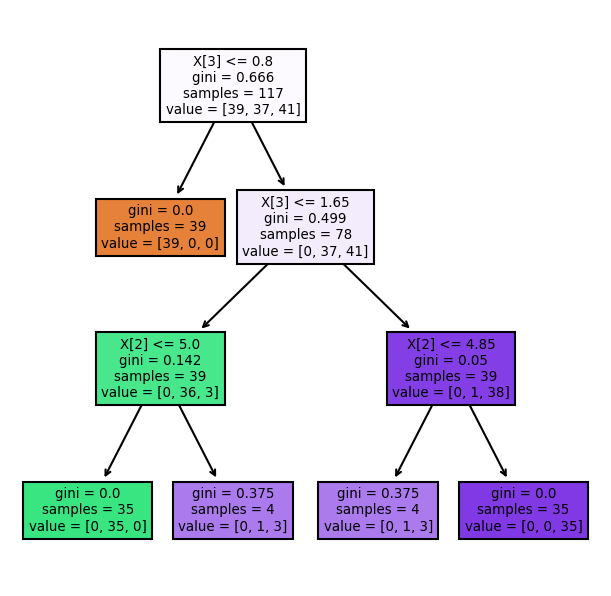

In [29]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=150)
tree.plot_tree(classifier,filled=True)
plt.show()